In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 국제유가 변동을 알면 더 나은 주유소를 선택할 수 있을 것이다.

In [4]:
'''
전제1) 국제유가 변동은 국내유가에 직접적인 영향을 미친다.
전제2) 주유는 주기적인 소비다.
전제3) 국제유가 변동은 쉽게 접할 수 있는 뉴스다.

가정1) 여러 상표들이 근거리에 모여있는 경우가 많다.
가정2) 상표별로 국제유가 변동에 대한 대응속도가 다르다.
가정3) 휘발유, 경유의 국제유가 변동에 대한 변화추이는 동일하다.

# 국제유가가 오르면, 대응속도가 느린 상표를 선택, 주유한다.
# 국제유가가 내려가면, 대응속도가 빠른 상표를 선택, 주유한다.
'''

'''
세계 석유거래에서 기준이 되고 있는 대표유종은 Dubai, Brent, WTi.
한국의 경우, 원유 수입의 78%를 Dubai유에 의존 (한국석유공사)

'''

'\n세계 석유거래에서 기준이 되고 있는 대표유종은 Dubai, Brent, WTi.\n한국의 경우, 원유 수입의 78%를 Dubai유에 의존 (한국석유공사)\n\n'

## 1. 2019년 상반기 주유소 판매가격 데이터 로드

In [5]:
first = pd.read_csv('../data/2019년 상반기 주유소 판매가격.csv', encoding='cp949')
first

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
90585,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190626,GS칼텍스,셀프,0,1529,1389,0
90586,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190627,GS칼텍스,셀프,0,1529,1389,0
90587,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190628,GS칼텍스,셀프,0,1529,1389,0
90588,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190629,GS칼텍스,셀프,0,1529,1389,0


## 2. 2019년 하반기 주유소 판매가격 데이터 로드

In [6]:
second = pd.read_csv('../data/2019년 하반기 주유소 판매가격.csv', encoding='cp949')
second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190704,SK에너지,셀프,1777,1577,1477,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190705,SK에너지,셀프,1777,1577,1477,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


## 3. 2019년 상/하반기 주유소 판매가격 통합

In [7]:
seoul_oil= pd.concat([first,second])
seoul_oil['기간']=pd.to_datetime(seoul_oil['기간'],format="%Y%m%d")
seoul_oil['월']=seoul_oil['기간'].dt.month
seoul_oil

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,월
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,1
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,1
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,1
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-27,GS칼텍스,셀프,0,1540,1389,1100,12
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-28,GS칼텍스,셀프,0,1540,1389,1100,12
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-29,GS칼텍스,셀프,0,1540,1389,1100,12
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-30,GS칼텍스,셀프,0,1540,1389,1100,12


## 4. 2019년 국제유가 변동 데이터 로드

In [8]:
global_oil = pd.read_csv('../data/국제유가2020-07-15.csv', encoding='cp949')
global_oil['Date']=pd.to_datetime(global_oil['Date'])
global_oil.rename(columns={'Date':'기간'}, inplace=True)
global_oil['연']=global_oil['기간'].dt.year
global_oil = global_oil[global_oil['연']==2019].sort_values(by="기간", ascending=True) # 2019-01-01 없음
global_oil

,기간,WTi,Brent,Dubai,연
393,2019-01-02,46.54,54.91,51.86,2019
392,2019-01-03,47.09,55.95,53.20,2019
391,2019-01-04,47.96,57.06,55.59,2019
390,2019-01-07,48.52,57.33,56.79,2019
389,2019-01-08,49.78,58.72,56.18,2019
...,...,...,...,...,...
141,2019-12-24,61.11,67.20,66.77,2019
140,2019-12-26,61.68,67.92,67.48,2019
139,2019-12-27,61.72,68.16,67.88,2019
138,2019-12-30,61.68,68.44,67.81,2019


## 5. 상표 종류 확인 후 상표별 일일 평균 휘발류 가격 도출

In [9]:
seoul_oil['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [10]:
seoul_oil_brand = seoul_oil.pivot_table(values=['휘발유'], index=['상표', '기간'])
seoul_oil_brand

휘발유
상표     기간                     
GS칼텍스  2019-01-01  1485.786765
       2019-01-02  1481.397059
       2019-01-03  1474.551471
       2019-01-04  1472.073529
       2019-01-05  1469.133333
...                        ...
현대오일뱅크 2019-12-27  1580.600000
       2019-12-28  1581.725000
       2019-12-29  1582.350000
       2019-12-30  1582.625000
       2019-12-31  1582.387500

[2735 rows x 1 columns]

In [11]:
GS칼텍스 = seoul_oil_brand.loc['GS칼텍스']
SK에너지 = seoul_oil_brand.loc['SK에너지']
SOIL = seoul_oil_brand.loc['S-OIL']
알뜰ex = seoul_oil_brand.loc['알뜰(ex)']
알뜰주유소 = seoul_oil_brand.loc['알뜰주유소']
현대오일뱅크 = seoul_oil_brand.loc['현대오일뱅크']
자가상표 = seoul_oil_brand.loc['자가상표']
NHOIL = seoul_oil_brand.loc['NH-OIL'] # 하반기 자료 없음

## 6. 시각화

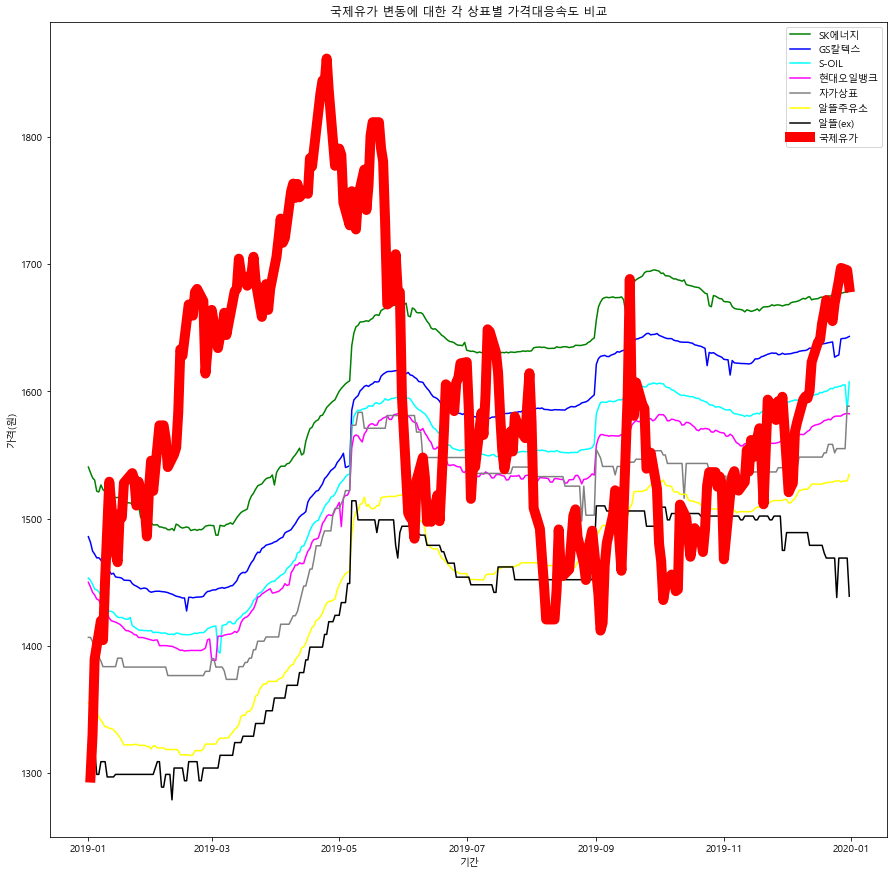

In [33]:
plt.figure(figsize=(15,15))

plt.plot(SK에너지, 'g', label='SK에너지')
plt.plot(GS칼텍스, 'b', label='GS칼텍스')
plt.plot(SOIL, 'cyan', label='S-OIL')
plt.plot(현대오일뱅크, 'magenta', label='현대오일뱅크')
plt.plot(자가상표, 'grey', label='자가상표')  
plt.plot(알뜰주유소, 'yellow', label='알뜰주유소')
plt.plot(알뜰ex, 'black', label='알뜰(ex)')

plt.plot(global_oil['기간'], global_oil['Dubai']*25, 'r', lw=10, label='국제유가')

plt.title('국제유가 변동에 대한 각 상표별 가격대응속도 비교')
plt.xlabel('기간')
plt.ylabel('가격(원)')
plt.legend()


# ax = seoul_oil.plot(x='기간', y='휘발유')
# ax2 = global_oil.plot(x='기간', y='Dubai', secondary_y=True, ax=ax)
# plt.plot()
plt.show()



# df = pd.DataFrame({'Age': [22, 12, 18, 25, 30],
#                    'Height': [155,129,138,164,145],
#                    'Weight': [60,40,45,55,60]})


# ax=df.plot(kind='line', x='Age', y='Height', color='DarkBlue')

# ax2=df.plot(kind='line', x='Age', y='Weight', secondary_y=True,color='Red', ax=ax)

# ax.set_ylabel('Height')
# ax2.set_ylabel('Weight')
# plt.tight_layout()

In [ ]:
# 우측에 원/달러 스케일 맞춘 축 추가해서 *25 지우기
# 일별을 주별로 바꾸면, 차이가 좀 더 극명해지려나?

## 국제유가를 비교하려 했는데, 오히려 각 상표별 평균가격 비교가 되버린 듯한..?

In [37]:
plt.figure(figsize=(20,20))

## 아래 왜 둘 다 안나오지..?
sns.boxplot(x=seoul_oil_brand['기간'], y=seoul_oil_brand['휘발유'], hue=seoul_oil_brand['상표'], data=seoul_oil_brand) 
sns.boxplot(x='기간', y='휘발유', hue='상표', data=seoul_oil_brand) 

#SK에너지.boxplot(column='휘발유')
#GS칼텍스.boxplot(column='휘발유')


# plt.plot(SK에너지, 'g', label='SK에너지')
# plt.plot(GS칼텍스, 'b', label='GS칼텍스')
# plt.plot(SOIL, 'cyan', label='S-OIL')
# plt.plot(현대오일뱅크, 'magenta', label='현대오일뱅크')
# plt.plot(자가상표, 'grey', label='자가상표')  
# plt.plot(알뜰주유소, 'yellow', label='알뜰주유소')
# plt.plot(알뜰ex, 'black', label='알뜰(ex)')
# plt.plot(global_oil['기간'], global_oil['Dubai']*25, 'r', lw=10, label='국제유가')

plt.title('2019년 각 상표별 휘발유 평균가격 변동추이')
# plt.xlabel('기간')
# plt.ylabel('가격(원)')
# plt.legend()
plt.show()

KeyError: '기간'

<Figure size 1440x1440 with 0 Axes>